In [1]:
import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

import warnings

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
sklearn.set_config(transform_output="pandas")

In [4]:
warnings.filterwarnings("ignore")

In [5]:
path = r"data\train_.csv"

train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1285,1.0,No info,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,1420,2.0,No info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,90,0.0,No info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,85,0.0,No info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,11:35:00,18:50:00,435,1.0,No info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,10:00:00,01:30:00,930,1.0,No info,15078
6691,Air India,2019-05-18,Delhi,Cochin,12:00:00,07:40:00,1180,2.0,No info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No info,8759


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          6694 non-null   object 
 1   date_of_journey  6694 non-null   object 
 2   source           6694 non-null   object 
 3   destination      6694 non-null   object 
 4   dep_time         6694 non-null   object 
 5   arrival_time     6694 non-null   object 
 6   duration         6694 non-null   int64  
 7   total_stops      6694 non-null   float64
 8   additional_info  6694 non-null   object 
 9   price            6694 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 523.1+ KB


In [7]:
train=train.dropna().reset_index(drop=True)
train

# drop the column with NULL value 

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1285,1.0,No info,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,1420,2.0,No info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,90,0.0,No info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,85,0.0,No info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,11:35:00,18:50:00,435,1.0,No info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,10:00:00,01:30:00,930,1.0,No info,15078
6691,Air India,2019-05-18,Delhi,Cochin,12:00:00,07:40:00,1180,2.0,No info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No info,8759


In [8]:
x_train = train.drop(columns="price")
y_train = train.price.copy()

In [9]:
!pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler,
    PowerTransformer,
    FunctionTransformer,
    OrdinalEncoder,
    StandardScaler
)
from feature_engine.encoding import(
    RareLabelEncoder,
    MeanEncoder,
    CountFrequencyEncoder
)

air_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),       # if there are NULL values fill them with the most frequent values
    ("grouper", RareLabelEncoder(tol=0.1, replace_with="Other",n_categories=2)),    # if there are some labels which occur for less than 10 percent of the time merge them all
    ("encoder", OneHotEncoder(sparse_output=False,handle_unknown="ignore"))       # At last use one hot encoding
])

air_transformer.fit_transform(x_train.loc[:, ["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
6689,0.0,0.0,0.0,0.0,1.0
6690,0.0,0.0,0.0,1.0,0.0
6691,1.0,0.0,0.0,0.0,0.0
6692,0.0,0.0,0.0,0.0,1.0


We have perform the OneHotEncoding on the Airline Column

In [11]:
x_train.date_of_journey

0       2019-05-27
1       2019-06-12
2       2019-05-18
3       2019-06-03
4       2019-04-01
           ...    
6689    2019-06-09
6690    2019-05-09
6691    2019-05-18
6692    2019-05-18
6693    2019-04-09
Name: date_of_journey, Length: 6694, dtype: object

In [12]:
from feature_engine.datetime import DatetimeFeatures

feature_to_extract = ["month","week","day_of_week","day_of_year"]

doj_transformer = Pipeline(steps=[
    ("dt", DatetimeFeatures(features_to_extract=feature_to_extract,yearfirst=True)),
    ("scaler",MinMaxScaler())
])

doj_transformer.fit_transform(x_train.loc[:,["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.666667,0.764706,0.000000,0.737288
1,1.000000,0.882353,0.333333,0.872881
2,0.666667,0.647059,0.833333,0.661017
3,1.000000,0.823529,0.000000,0.796610
4,0.333333,0.294118,0.000000,0.262712
...,...,...,...,...
6689,1.000000,0.823529,1.000000,0.847458
6690,0.666667,0.588235,0.500000,0.584746
6691,0.666667,0.647059,0.833333,0.661017
6692,0.666667,0.647059,0.833333,0.661017


Here we have created columns like month, week, day of week and day of year from the date of journey column.

In [13]:
x_train.source

0         Delhi
1       Kolkata
2         Delhi
3        Mumbai
4        Mumbai
         ...   
6689    Kolkata
6690      Delhi
6691      Delhi
6692      Delhi
6693      Delhi
Name: source, Length: 6694, dtype: object

In [14]:
x_train.destination

0          Cochin
1        Banglore
2          Cochin
3       Hyderabad
4       Hyderabad
          ...    
6689     Banglore
6690       Cochin
6691       Cochin
6692       Cochin
6693       Cochin
Name: destination, Length: 6694, dtype: object

In [15]:
location_subset = x_train.loc[:,["source","destination"]]
location_subset

,source,destination
0,Delhi,Cochin
1,Kolkata,Banglore
2,Delhi,Cochin
3,Mumbai,Hyderabad
4,Mumbai,Hyderabad
...,...,...
6689,Kolkata,Banglore
6690,Delhi,Cochin
6691,Delhi,Cochin
6692,Delhi,Cochin


In [47]:
location_pipe1 = Pipeline(steps=[
    ("grouper", RareLabelEncoder(tol=0.1,replace_with="Other",n_categories=2)),
    ("encoder",OneHotEncoder(sparse_output=False)),       # mean encoder will replace each category with the mean value of price for that category
    ("scaler", PowerTransformer())   # this transforms the column and also stranderdize that 
])

location_pipe1.fit_transform(location_subset,y_train)

,source_Banglore,source_Delhi,source_Kolkata,source_Other,destination_Banglore,destination_Cochin,destination_Delhi,destination_Other
0,-0.503779,1.186190,-0.624460,-0.336258,-0.624460,1.186190,-0.356281,-0.486469
1,-0.503779,-0.843035,1.601384,-0.336258,1.601384,-0.843035,-0.356281,-0.486469
2,-0.503779,1.186190,-0.624460,-0.336258,-0.624460,1.186190,-0.356281,-0.486469
3,-0.503779,-0.843035,-0.624460,2.973906,-0.624460,-0.843035,-0.356281,2.055628
4,-0.503779,-0.843035,-0.624460,2.973906,-0.624460,-0.843035,-0.356281,2.055628
...,...,...,...,...,...,...,...,...
6689,-0.503779,-0.843035,1.601384,-0.336258,1.601384,-0.843035,-0.356281,-0.486469
6690,-0.503779,1.186190,-0.624460,-0.336258,-0.624460,1.186190,-0.356281,-0.486469
6691,-0.503779,1.186190,-0.624460,-0.336258,-0.624460,1.186190,-0.356281,-0.486469
6692,-0.503779,1.186190,-0.624460,-0.336258,-0.624460,1.186190,-0.356281,-0.486469


In [17]:
np.union1d(
    x_train.source.unique(),
    x_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai', 'New Delhi'], dtype=object)

In [18]:
def is_north(x):
    north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
    columns = x.columns
    return(
        x
        .assign(**{
            f"{col}_is_north" : x.loc[:,col].isin(north_cities).astype(int)
            for col in columns
        })
        .drop(columns=columns)
    )

FunctionTransformer(func=is_north).fit_transform(location_subset)     # FunctionTransformer is used to  apply a python function as part of scikit learn pipeline 

,source_is_north,destination_is_north
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6689,1,0
6690,1,0
6691,1,0
6692,1,0


In [19]:
from sklearn.pipeline import FeatureUnion

#  featureunion is used to combine multiple transformation 
location_transformer = FeatureUnion(transformer_list=[
    ("part1", location_pipe1),
    ("part2", FunctionTransformer(func=is_north))
])
location_transformer.fit_transform(location_subset,y_train)

,source,destination,source_is_north,destination_is_north
0,1.040187,1.039963,1,0
1,-0.190314,-0.185612,1,0
2,1.040187,1.039963,1,0
3,-1.915733,-0.892199,1,0
4,-1.915733,-0.892199,1,0
...,...,...,...,...
6689,-0.190314,-0.185612,1,0
6690,1.040187,1.039963,1,0
6691,1.040187,1.039963,1,0
6692,1.040187,1.039963,1,0


Here we have use meanencoding to encode the categorical column of source and destination. Also, we have created a new column named is_north. 

In [20]:
x_train.dep_time

0       20:55:00
1       18:55:00
2       09:45:00
3       21:20:00
4       02:55:00
          ...   
6689    11:35:00
6690    10:00:00
6691    12:00:00
6692    07:55:00
6693    08:00:00
Name: dep_time, Length: 6694, dtype: object

In [21]:
x_train.arrival_time

0       12:35:00
1       16:20:00
2       09:25:00
3       22:50:00
4       04:20:00
          ...   
6689    18:50:00
6690    01:30:00
6691    07:40:00
6692    13:25:00
6693    19:00:00
Name: arrival_time, Length: 6694, dtype: object

In [22]:
time_subset = x_train.loc[:,["dep_time","arrival_time"]]
time_subset

,dep_time,arrival_time
0,20:55:00,12:35:00
1,18:55:00,16:20:00
2,09:45:00,09:25:00
3,21:20:00,22:50:00
4,02:55:00,04:20:00
...,...,...
6689,11:35:00,18:50:00
6690,10:00:00,01:30:00
6691,12:00:00,07:40:00
6692,07:55:00,13:25:00


In [23]:
time_pipe1 = Pipeline(steps=[
    ("dt", DatetimeFeatures(features_to_extract=["hour","minute"])),
    ("scaler",MinMaxScaler())

])
time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.869565,1.000000,0.521739,0.636364
1,0.782609,1.000000,0.695652,0.363636
2,0.391304,0.818182,0.391304,0.454545
3,0.913043,0.363636,0.956522,0.909091
4,0.086957,1.000000,0.173913,0.363636
...,...,...,...,...
6689,0.478261,0.636364,0.782609,0.909091
6690,0.434783,0.000000,0.043478,0.545455
6691,0.521739,0.000000,0.304348,0.727273
6692,0.304348,1.000000,0.565217,0.454545


In [24]:
def part_of_the_day(x, morning=4, noon=12, eve=16, night=20):
    columns = x.columns.to_list()
    x_temp = x.assign(**{
        col: pd.to_datetime(x.loc[:,col]).dt.hour  # for each columns extract hour value for all the rows
        for col in columns
    })

    return (
        x_temp
        .assign(**{
            f"{col}_part_of_the_day" : np.select(
                [x_temp.loc[:, col].between(morning, noon, inclusive="left"),
				x_temp.loc[:, col].between(noon, eve, inclusive="left"),
			    x_temp.loc[:, col].between(eve, night, inclusive="left")],
                ["morning","afternoon","evening"],
                default="night"
            )
            for col in columns
        })
        .drop(columns=columns)
    )

FunctionTransformer(func=part_of_the_day).fit_transform(time_subset)

,dep_time_part_of_the_day,arrival_time_part_of_the_day
0,night,afternoon
1,evening,evening
2,morning,morning
3,night,night
4,night,morning
...,...,...
6689,morning,evening
6690,morning,night
6691,afternoon,morning
6692,morning,afternoon


In [25]:
time_pipe2 = Pipeline(steps=[
    ("part", FunctionTransformer(func=part_of_the_day)),
    ("encoder", CountFrequencyEncoder()),   # calculates the total count of that feature category and replace the category with that value
    ("scaler",MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_the_day,arrival_time_part_of_the_day
0,0.159827,0.000000
1,0.195680,0.699256
2,1.000000,0.968119
3,0.159827,1.000000
4,0.159827,0.968119
...,...,...
6689,1.000000,0.699256
6690,1.000000,1.000000
6691,0.000000,0.968119
6692,1.000000,0.000000


In [26]:
time_transformer = FeatureUnion(
    transformer_list=[
        ("part1", time_pipe1),
        ("pipe2", time_pipe2)
    ])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_the_day,arrival_time_part_of_the_day
0,0.869565,1.000000,0.521739,0.636364,0.159827,0.000000
1,0.782609,1.000000,0.695652,0.363636,0.195680,0.699256
2,0.391304,0.818182,0.391304,0.454545,1.000000,0.968119
3,0.913043,0.363636,0.956522,0.909091,0.159827,1.000000
4,0.086957,1.000000,0.173913,0.363636,0.159827,0.968119
...,...,...,...,...,...,...
6689,0.478261,0.636364,0.782609,0.909091,1.000000,0.699256
6690,0.434783,0.000000,0.043478,0.545455,1.000000,1.000000
6691,0.521739,0.000000,0.304348,0.727273,0.000000,0.968119
6692,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000


Here we have extracted hour, minute inforamtion for arrival time and departure time. Also we have spliited the day into morning, afternoon, evening, night and encoded that using their frequency.

In [27]:
x_train.duration

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

In [28]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None, percentile=[0.25, 0.5, 0.75],gamma=0.1):
        self.variables = variables
        self.percentile = percentile
        self.gamma = gamma 

    def fit(self,x,y=None):
        if not self.variables:
            self.variables = x.select_dtypes(include="number").columns.to_list()

        self.reference_values_ = {
            col:(
                x
                .loc[:, col]
                .quantile(self.percentile)
                .values
                .reshape(-1,1)
            )
            for col in self.variables
        }

        return self
    
    def transform(self,x):
        objects=[]
        for col in self.variables:
            columns = [f"{col}_rbf_{int(percentile*100)}" for percentile in self.percentile]
            obj = pd.DataFrame(
                data = rbf_kernel(x.loc[: ,[col]],Y=self.reference_values_[col],gamma = self.gamma), 
                columns=columns
            )
            # print(obj)
            objects.append(obj)

        return pd.concat(objects,axis=1)

In [29]:
RBFPercentileSimilarity(percentile=[0.4, 0.8]).fit_transform(x_train)

,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,0.000000e+00,0.000000e+00,1.000000,1.000000
1,0.000000e+00,0.000000e+00,1.000000,1.000000
2,0.000000e+00,0.000000e+00,0.904837,0.904837
3,0.000000e+00,0.000000e+00,0.904837,0.904837
4,0.000000e+00,0.000000e+00,0.904837,0.904837
...,...,...,...,...
6689,1.569292e-213,0.000000e+00,1.000000,1.000000
6690,0.000000e+00,0.000000e+00,1.000000,1.000000
6691,0.000000e+00,1.125982e-278,0.904837,0.904837
6692,6.293989e-54,0.000000e+00,1.000000,1.000000


In [30]:
def duration_category(x, short=180, med=500):
    return (
        x
        .assign(duration_cat=np.select([x.duration.between(0,short),
                                        x.duration.between(short,med,inclusive = "left")],
                                        ["short", "medium"],
                                        default = "long"))
        .drop(columns="duration")
    )

In [31]:
def is_over(x, value=1000):
    return (
        x
        .assign(**{
            f"duration_over_{value}" : x.duration.ge(value).astype(int)
        })
        .drop(columns="duration")
    )

In [32]:
from feature_engine.outliers import Winsorizer

# first pipeline is for creating new features with the help of RBF kernel
duration_pipe1 = Pipeline(steps=[
    ("rbf", RBFPercentileSimilarity()),
    ("scaler", PowerTransformer())
])

# second pipeline creates a new feature called duration_category and then encode it 
duration_pipe2 = Pipeline(steps=[
    ("cat", FunctionTransformer(func=duration_category)),
    ("encoder", OrdinalEncoder(categories=[["short","medium","long"]]))
])

# here we combine all the pipeline to create a single one also add one another function which creates new feature which tells whether it is greater than or less than a particular value  
duration_union = FeatureUnion(transformer_list=[
    ("part1", duration_pipe1),
    ("part2", duration_pipe2),
    ("part3", FunctionTransformer(func=is_over)),
    ("part4", StandardScaler())    # it will add duration column to this pipeline and also perform standard scaling operation on duration column only
])

duration_transformer = Pipeline(steps=[
    ("outliers", Winsorizer(capping_method="iqr", fold=1.5)),  # it will cap the outliers value according to the iqr method 
    ("imputer", SimpleImputer(strategy = "median")),
    ("union", duration_union)
])

duration_transformer.fit_transform(x_train.loc[:,["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.353152,-0.119075,-0.099367,2.0,0,0.609935
1,-0.353152,-0.119075,-0.099368,2.0,1,1.301752
2,-0.353152,-0.119075,-0.099368,2.0,1,1.572463
3,-0.353152,-0.119075,-0.099368,0.0,0,-1.094542
4,-0.353152,-0.119075,-0.099368,0.0,0,-1.104568
...,...,...,...,...,...,...
6689,-0.353152,-0.119075,-0.099368,1.0,0,-0.402725
6690,-0.353152,-0.119075,10.098457,2.0,0,0.589882
6691,-0.353152,-0.119075,-0.099368,2.0,1,1.091199
6692,-0.353152,-0.119075,-0.099368,1.0,0,-0.613278


First we have calculated the 25th percentile, 50th percentile and 75th percentile vlue of duration and then we have calculated the similarity value of duration from these calculated value using RBF Kernel. Also, we have categorise the duration into short, medium and long and then perform ordianl encoding on it. Also, we have calculated feature called duration over 1000 minutes and perform scaling on duration column.

In [33]:
x_train.total_stops

0       1.0
1       1.0
2       2.0
3       0.0
4       0.0
       ... 
6689    1.0
6690    1.0
6691    2.0
6692    1.0
6693    1.0
Name: total_stops, Length: 6694, dtype: float64

In [34]:
def is_direct(x):
    return x.assign(is_direct_flight = x.total_stops.eq(0).astype(int))

total_stops_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("isDirect", FunctionTransformer(func = is_direct))
])

total_stops_transformer.fit_transform(x_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,1.0,0
1,1.0,0
2,2.0,0
3,0.0,1
4,0.0,1
...,...,...
6689,1.0,0
6690,1.0,0
6691,2.0,0
6692,1.0,0


For the total_stop column we have just add another column is_direct_flight which is 1 if total_stops value is 0 and 0 for any other value of total_stops

In [35]:
x_train.additional_info

0       In-flight meal not included
1                           No info
2                           No info
3                           No info
4                           No info
                   ...             
6689                        No info
6690                        No info
6691                        No info
6692                        No info
6693                        No info
Name: additional_info, Length: 6694, dtype: object

In [36]:
info_pipe1 = Pipeline(steps=[
    ("group", RareLabelEncoder(tol=0.10, n_categories=2, replace_with="Other")),
    ("encoder", OneHotEncoder(handle_unknown = "ignore", sparse_output = False))
])

info_pipe1.fit_transform(x_train.loc[:,["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No info,additional_info_Other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
6689,0.0,1.0,0.0
6690,0.0,1.0,0.0
6691,0.0,1.0,0.0
6692,0.0,1.0,0.0


In [37]:
def have_info(x):
    return x.assign(additional_info = x.additional_info.str.lower()!="no info").astype(int)

In [38]:
info_union = FeatureUnion(transformer_list=[
    ("part1", info_pipe1),
    ("part2", FunctionTransformer(func = have_info))
])

In [39]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_union.fit_transform(x_train.loc[:,["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No info,additional_info_Other,additional_info
0,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
6689,0.0,1.0,0.0,0
6690,0.0,1.0,0.0,0
6691,0.0,1.0,0.0,0
6692,0.0,1.0,0.0,0


For additional_info column we have first combine the categories of additional_info column which are occuring for less than 10 percent of the time and then perform OneHotEncoding on it. Also created a column named additional_info which is 0 if value in additional_info column is no info and else for any ither value in additional_info column it is 1.

Column Transformer

In [40]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(transformers=[
    ("air", air_transformer, ["airline"]),
    ("doj", doj_transformer, ["date_of_journey"]),
    ("location", location_transformer, ["source", "destination"]),
    ("time", time_transformer, ["dep_time", "arrival_time"]),
    ("dur", duration_transformer, ["duration"]),
    ("stops", total_stops_transformer, ["total_stops"]),
    ("info", info_transformer, ["additional_info"])
],remainder="passthrough")

column_transformer.fit_transform(x_train,y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_the_day,time__arrival_time_part_of_the_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.666667,0.764706,0.000000,0.737288,1.040187,1.039963,1,0,0.869565,1.000000,0.521739,0.636364,0.159827,0.000000,-0.353152,-0.119075,-0.099367,2.0,0,0.609935,1.0,0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,1.000000,0.882353,0.333333,0.872881,-0.190314,-0.185612,1,0,0.782609,1.000000,0.695652,0.363636,0.195680,0.699256,-0.353152,-0.119075,-0.099368,2.0,1,1.301752,1.0,0,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,1.040187,1.039963,1,0,0.391304,0.818182,0.391304,0.454545,1.000000,0.968119,-0.353152,-0.119075,-0.099368,2.0,1,1.572463,2.0,0,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0.0,0.0,1.000000,0.823529,0.000000,0.796610,-1.915733,-0.892199,1,0,0.913043,0.363636,0.956522,0.909091,0.159827,1.000000,-0.353152,-0.119075,-0.099368,0.0,0,-1.094542,0.0,1,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.333333,0.294118,0.000000,0.262712,-1.915733,-0.892199,1,0,0.086957,1.000000,0.173913,0.363636,0.159827,0.968119,-0.353152,-0.119075,-0.099368,0.0,0,-1.104568,0.0,1,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,0.0,0.0,0.0,0.0,1.0,1.000000,0.823529,1.000000,0.847458,-0.190314,-0.185612,1,0,0.478261,0.636364,0.782609,0.909091,1.000000,0.699256,-0.353152,-0.119075,-0.099368,1.0,0,-0.402725,1.0,0,0.0,1.0,0.0,0
6690,0.0,0.0,0.0,1.0,0.0,0.666667,0.588235,0.500000,0.584746,1.040187,1.039963,1,0,0.434783,0.000000,0.043478,0.545455,1.000000,1.000000,-0.353152,-0.119075,10.098457,2.0,0,0.589882,1.0,0,0.0,1.0,0.0,0
6691,1.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,1.040187,1.039963,1,0,0.521739,0.000000,0.304348,0.727273,0.000000,0.968119,-0.353152,-0.119075,-0.099368,2.0,1,1.091199,2.0,0,0.0,1.0,0.0,0
6692,0.0,0.0,0.0,0.0,1.0,0.666667,0.647059,0.833333,0.661017,1.040187,1.039963,1,0,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000,-0.353152,-0.119075,-0.099368,1.0,0,-0.613278,1.0,0,0.0,1.0,0.0,0


In [41]:
from sklearn.ensemble import RandomForestRegressor
from feature_engine.selection import SelectBySingleFeaturePerformance

# This is the model which will be train on each independent column(feature) and will predict the dependent column(y) 
estimator = RandomForestRegressor(n_estimators = 50, max_depth = 3, random_state = 42)

# This will select column by using model and predicting and if r2 score is less than 10 percent it will drop that column.
selector = SelectBySingleFeaturePerformance(
    estimator=estimator,
    scoring = "r2",
    threshold = 0.1
)

In [42]:
preprocessor = Pipeline(steps=[
    ("ct", column_transformer),
    ("selector", selector)
])

preprocessor.fit_transform(x_train,y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,dur__duration_rbf_25,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.764706,0.737288,1.040187,1.039963,-0.353152,2.0,0,0.609935,1.0,0
1,0.0,1.0,0.0,0.882353,0.872881,-0.190314,-0.185612,-0.353152,2.0,1,1.301752,1.0,0
2,0.0,0.0,0.0,0.647059,0.661017,1.040187,1.039963,-0.353152,2.0,1,1.572463,2.0,0
3,1.0,0.0,0.0,0.823529,0.796610,-1.915733,-0.892199,-0.353152,0.0,0,-1.094542,0.0,1
4,0.0,1.0,0.0,0.294118,0.262712,-1.915733,-0.892199,-0.353152,0.0,0,-1.104568,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,0.0,0.0,1.0,0.823529,0.847458,-0.190314,-0.185612,-0.353152,1.0,0,-0.402725,1.0,0
6690,0.0,0.0,0.0,0.588235,0.584746,1.040187,1.039963,-0.353152,2.0,0,0.589882,1.0,0
6691,0.0,0.0,0.0,0.647059,0.661017,1.040187,1.039963,-0.353152,2.0,1,1.091199,2.0,0
6692,0.0,0.0,1.0,0.647059,0.661017,1.040187,1.039963,-0.353152,1.0,0,-0.613278,1.0,0


Here first we have applied all the transformation to x_train and y_train. We get 31 column in out newly transformed dataset.

THen we have used Feature Selection Algorithm which selects 13 features out of 31 features. 

In [43]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': 0.0019172501130231279,
 'air__airline_Indigo': 0.1250823169102455,
 'air__airline_Jet Airways': 0.18242944209970802,
 'air__airline_Multiple Carriers': 0.018646260484395365,
 'air__airline_Other': 0.11337809412718702,
 'doj__date_of_journey_month': 0.0817180322702813,
 'doj__date_of_journey_week': 0.17194540338512623,
 'doj__date_of_journey_day_of_week': 0.0004539708567987688,
 'doj__date_of_journey_day_of_year': 0.21298721794441233,
 'location__source': 0.12615152826194298,
 'location__destination': 0.12227747889911333,
 'location__source_is_north': 0.02831493799209417,
 'location__destination_is_north': 0.02831493799209417,
 'time__dep_time_hour': 0.009207901787834594,
 'time__dep_time_minute': 0.03129736609288084,
 'time__arrival_time_hour': 0.0713015791050969,
 'time__arrival_time_minute': 0.03137617630736326,
 'time__dep_time_part_of_the_day': -0.00034612472768795016,
 'time__arrival_time_part_of_the_day': 0.03043406009294099,
 'dur__duration_rbf_25': 0.

In [44]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'info__additional_info': -0.0005949101906749613,
 'info__additional_info_No info': -0.000590936933754227,
 'time__dep_time_part_of_the_day': -0.00034612472768795016,
 'dur__duration_rbf_75': -5.517163854129592e-05,
 'doj__date_of_journey_day_of_week': 0.0004539708567987688,
 'info__additional_info_In-flight meal not included': 0.0017607890047511103,
 'air__airline_Air India': 0.0019172501130231279,
 'dur__duration_rbf_50': 0.005119701931800151,
 'time__dep_time_hour': 0.009207901787834594,
 'air__airline_Multiple Carriers': 0.018646260484395365,
 'info__additional_info_Other': 0.018728479300247496,
 'location__source_is_north': 0.02831493799209417,
 'location__destination_is_north': 0.02831493799209417,
 'time__arrival_time_part_of_the_day': 0.03043406009294099,
 'time__dep_time_minute': 0.03129736609288084,
 'time__arrival_time_minute': 0.03137617630736326,
 'time__arrival_time_hour': 0.0713015791050969,
 'doj__date_of_journey_month': 0.0817180322702813,
 'dur__duration_over_1000': 0

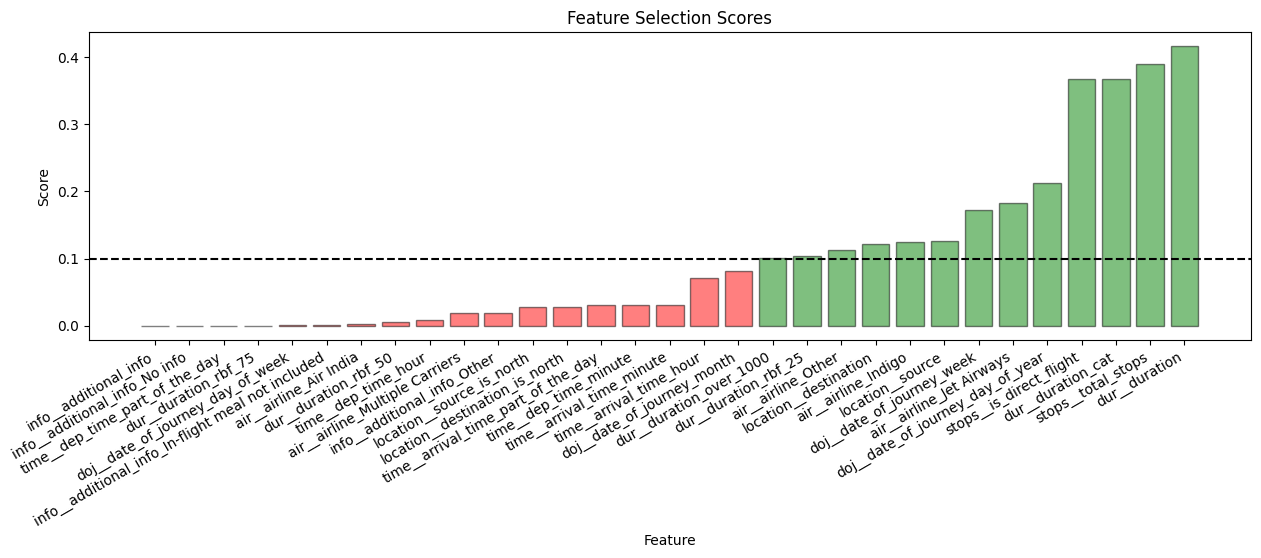

In [45]:
# colors = ["red" if score < 0.1 else "green" for score in sorted_feat_imp.values()]

fig,ax = plt.subplots(figsize=(15,4))

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
    param = dict(
        x=i,
        height = score,
        edgecolor = "black",
        alpha = 0.5
    )

    if score < 0.1:
        bar = ax.bar(
            color = "red",
            **param
        )
    else: 
        bar = ax.bar(
            color = "green",
            **param
        )

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

plt.show()